## Assigment 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from a6_utils import drawEllipse

### Exercise 1

### A

A = (3, 4), B = (3, 6), C = (7, 6), and D = (6, 4)  

mean value of X = (3 + 3 + 7 + 6, 4 + 6 + 6 + 4) / 4 = (19, 20) / 4 = (4.75, 5)  

centered X matrix:

$$\begin{bmatrix} -1.75 & -1.75 & 2.25 & 1.25 \\ -1 & 1 & 1 & -1 \end{bmatrix}$$

covariance matrix: 

$$\begin{bmatrix} \frac{17}{4} & \frac{1}{3} \\ \frac{1}{3} & \frac{4}{3} \end{bmatrix}$$


### B

In [2]:
def mean(X):
    return np.mean(X, axis=1).reshape(-1, 1)

def centered(X):
    return X - mean(X)

def covariance_matrix(X):
    X_centered = centered(X)
    N = X_centered.shape[1] - 1
    return np.dot(X_centered, X_centered.T) / N

def main_components(X):
    X_covariance = covariance_matrix(X)
    main_directions, importance, _ = np.linalg.svd(X_covariance)
    return main_directions, importance


In [3]:
points = np.fromfile('./assigments/assignment6/data/points.txt', dtype=float, sep=' ').reshape(-1, 2).T
points

array([[1., 6., 5., 1., 0.],
       [0., 2., 4., 3., 1.]])

(-2.0, 8.0)

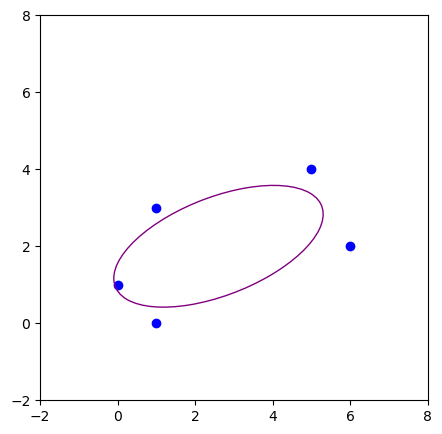

In [4]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

### C

In [5]:
main_directions, importance = main_components(points)
main_directions, importance

(array([[-0.92992935, -0.36773822],
        [-0.36773822,  0.92992935]]),
 array([8.18975683, 1.61024317]))

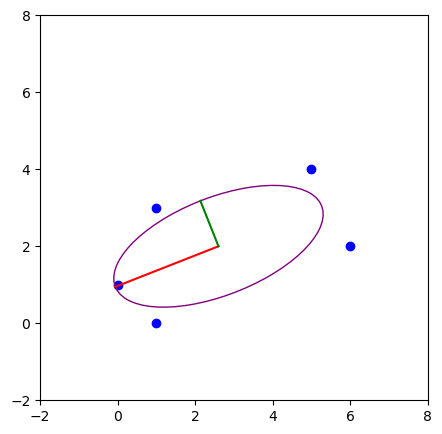

In [6]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

mean_point = mean(points)

center = mean_point
end_red = mean_point + main_directions[:, [0]] * np.sqrt(importance[0])
end_green = mean_point + main_directions[:, [1]] * np.sqrt(importance[1])
plt.plot([center[0], end_red[0]], [center[1], end_red[1]], color='red')
plt.plot([center[0], end_green[0]], [center[1], end_green[1]], color='green')

### D

<BarContainer object of 2 artists>

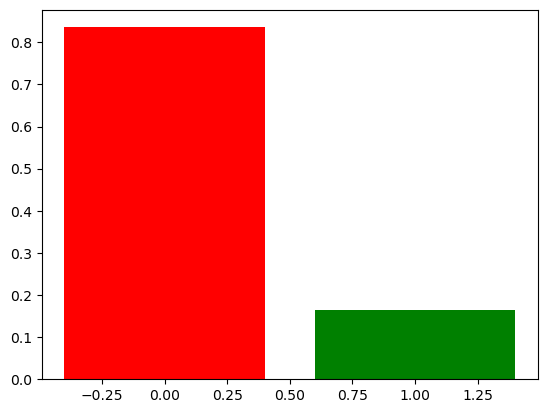

In [7]:
# plot the eigenvalues
plt.bar([0, 1], importance/np.sum(importance), color=['red', 'green'])

### E

(-5.0, 5.0)

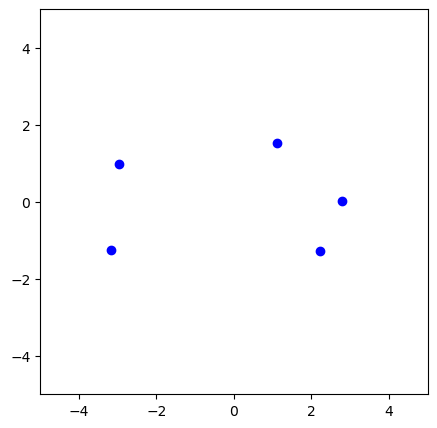

In [8]:
fig = plt.figure(figsize=(5,5))

pca_points = np.dot(main_directions.T, centered(points))
plt.scatter(pca_points[0], pca_points[1], color='blue')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [9]:
pca_projected_points = pca_points.copy()
pca_projected_points[1, :] = 0

reconstructed_points = np.dot(main_directions, pca_projected_points) + mean(points)

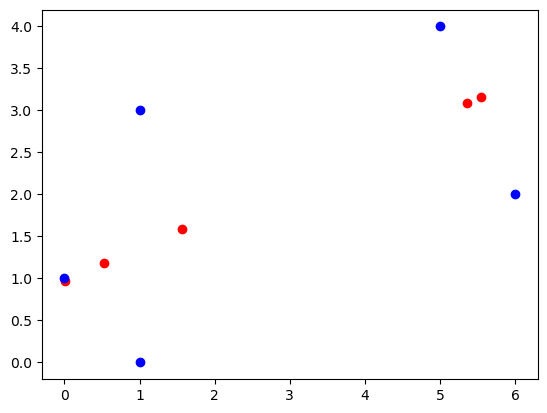

In [10]:
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='red')
plt.scatter(points[0], points[1], color='blue')

### F

In [11]:
q_point = np.array([[6], [6]])

closes_point = np.argmin(np.linalg.norm(points - q_point, axis=0))

pca_q_point = np.dot(main_directions.T, q_point - mean(points))
pca_q_point[1] = 0

reconstructed_q_point = np.dot(main_directions, pca_q_point) + mean(points)

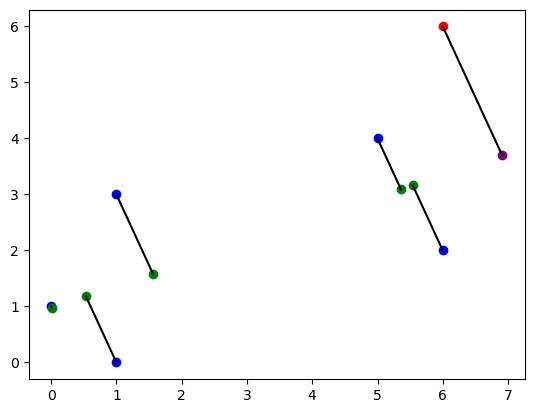

In [12]:
plt.scatter(points[0], points[1], color='blue')
plt.scatter(q_point[0], q_point[1], color='red')

plt.scatter(reconstructed_points[0], reconstructed_points[1], color='green')
plt.scatter(reconstructed_q_point[0], reconstructed_q_point[1], color='purple')

plt.plot([q_point[0], reconstructed_q_point[0]], [q_point[1], reconstructed_q_point[1]], color='black')
for i in range(points.shape[1]):
    plt.plot([points[0, i], reconstructed_points[0, i]], [points[1, i], reconstructed_points[1, i]], color='black')

## Exercise 2

### A

In [13]:
def dual_pca(X):
    N = X.shape[1]
    X_centered = centered(X)
    ipm = np.dot(X_centered.T, X_centered) / (N - 1)
    main_directions, importance, _ = np.linalg.svd(ipm)
    importance += 10**-15
    main_directions = np.dot(X_centered, main_directions) / np.sqrt((N - 1) * importance)
    return main_directions, importance

In [14]:
dp_main_directions, dp_importance = dual_pca(points)
main_directions, dp_main_directions[:2, :2]

(array([[-0.92992935, -0.36773822],
        [-0.36773822,  0.92992935]]),
 array([[ 0.92992935, -0.36773822],
        [ 0.36773822,  0.92992935]]))

In [15]:
dp_main_directions[:, 0] *= -1

### B

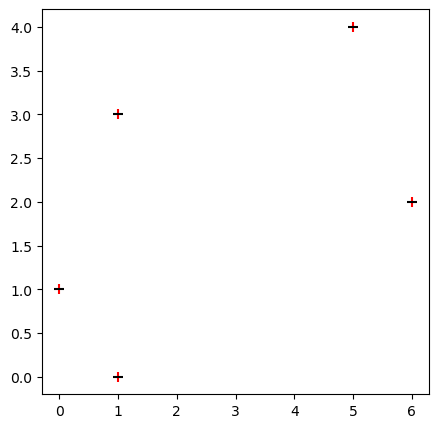

In [16]:
# offset
offset = mean(points)

missing_dimensions = dp_main_directions.shape[1] -  main_directions.shape[1]
pca_points_in_dual_space = np.vstack([pca_points, np.zeros((missing_dimensions, pca_points.shape[1]))])
reconstructed_points = np.dot(dp_main_directions, pca_points_in_dual_space) + mean_point

# plot
fig = plt.figure(figsize=(5,5))
plt.scatter(points[0], points[1], color='red', marker='|', s=50)
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='black', marker='_', s=50)

## Exercise 3

### A

In [17]:
import os
import cv2
def load_space(directory):
    # load each image as a grayscale vector
    images = []
    image_shape = None
    for image_name in os.listdir(directory):
        image = cv2.imread(os.path.join(directory, image_name), cv2.IMREAD_GRAYSCALE)
        images.append(image.flatten() / 255)
        image_shape = image.shape
    return np.array(images).T, image_shape

In [18]:
space_one, one_sahpe = load_space('./assigments/assignment6/data/faces/1')
space_one.shape, one_sahpe

((8064, 64), (96, 84))

In [19]:
space_two, two_shape = load_space('./assigments/assignment6/data/faces/2')
space_two.shape, two_shape

((8064, 64), (96, 84))

In [20]:
space_three, three_shape = load_space('./assigments/assignment6/data/faces/3')
space_three.shape, three_shape

((8064, 64), (96, 84))

### B

In [21]:
def transofrmation_parameters(X):
    main_directions, importance = dual_pca(X)
    m = mean(X)
    return main_directions, m

In [22]:
space_one_eginvectors, space_one_means = transofrmation_parameters(space_one)

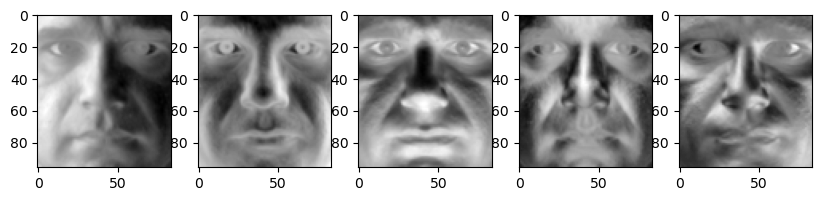

In [23]:
N = 5
fig = plt.figure(figsize=(10, 10))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(space_one_eginvectors[:, i].reshape(*one_sahpe), cmap='gray')

In [24]:
def project(X, eginvectors, mean):
    return np.dot(eginvectors.T, X - mean)
    
def reconstruct(X, eginvectors, mean):
    return np.dot(eginvectors, X) + mean

In [25]:
first_image = space_one[:, [0]]
first_image.shape

(8064, 1)

In [26]:
projected = project(first_image, space_one_eginvectors, space_one_means)
projected.shape

(64, 1)

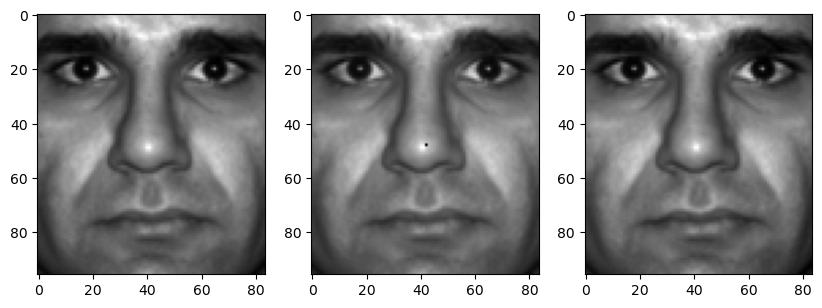

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(first_image.reshape(*one_sahpe), cmap='gray')

first_image_without_4074 = first_image.copy()
first_image_without_4074[4074] = 0
ax[1].imshow(first_image_without_4074.reshape(*one_sahpe), cmap='gray')

projected_without_main = projected.copy()
projected_without_main[0] = 0
reconstructed_without_main = reconstruct(projected_without_main, space_one_eginvectors, space_one_means)
ax[2].imshow(reconstructed_without_main.reshape(*one_sahpe), cmap='gray')

In [28]:
len(np.argwhere(first_image != reconstructed_without_main))

8064

### C

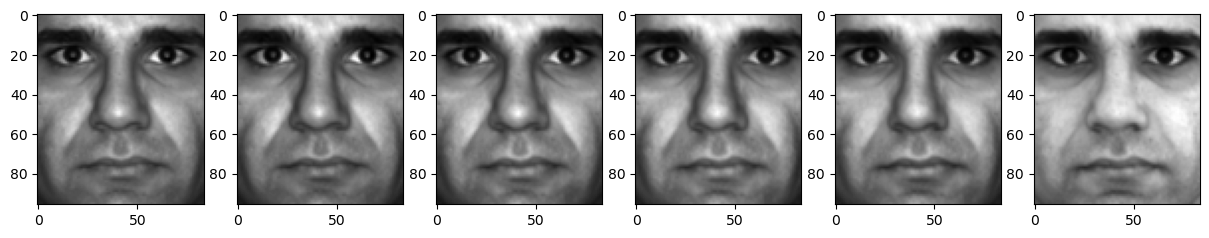

In [29]:
projected_step_reduce = projected.copy()

fig, ax = plt.subplots(1, 6, figsize=(15, 5))

for i in range(5, -1, -1):
    projected_step_reduce[2**i:] = 0
    reconstructed_step_reduce = reconstruct(projected_step_reduce, space_one_eginvectors, space_one_means)
    ax[5-i].imshow(reconstructed_step_reduce.reshape(*one_sahpe), cmap='gray')

### D

In [30]:
space_two_eginvectors, space_two_means = transofrmation_parameters(space_two)

In [31]:
projected_mean = project(space_two[:, [0]], space_two_eginvectors, space_two_means)

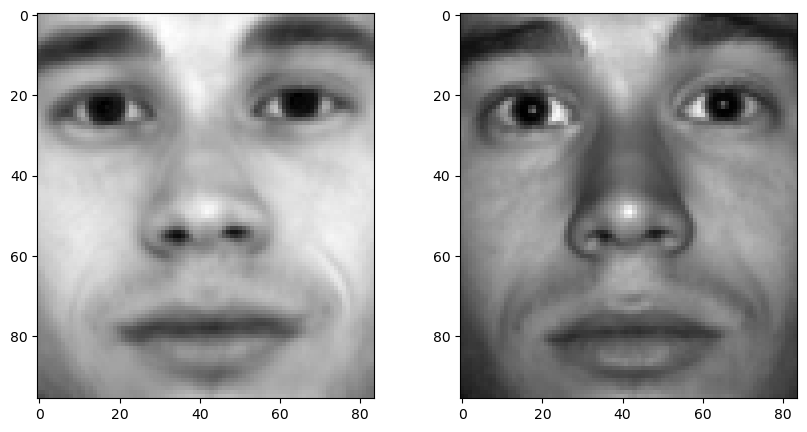

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(space_two_means.reshape(*two_shape), cmap='gray')

ax[1].imshow(reconstruct(projected_mean, space_two_eginvectors, space_two_means).reshape(*two_shape), cmap='gray')

In [33]:
def reconstruct_with_weight(X, i, scale=3000, loops=1, samples=100):
    local_egin = space_two_eginvectors.copy()
    for _ in range(loops):
        value = np.sin(np.linspace(0, 2*np.pi, num=samples))
        for v in value:
            local_egin[:, :i] = v * scale
            yield reconstruct(X, local_egin, space_two_means)

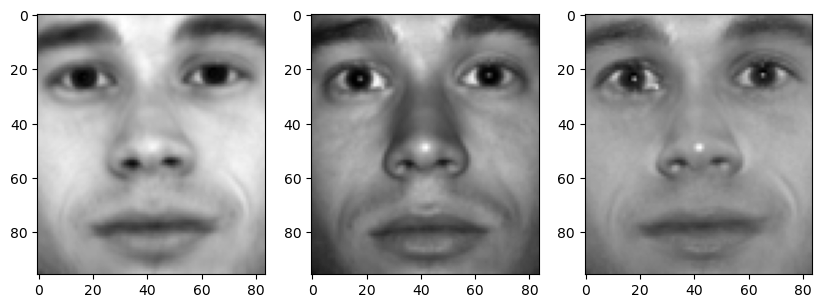

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [34]:
from time import sleep
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(space_two_means.reshape(*two_shape), cmap='gray')

ax[1].imshow(reconstruct(projected_mean, space_two_eginvectors, space_two_means).reshape(*two_shape), cmap='gray')

samples = 1
generator = reconstruct_with_weight(projected_mean, 10, loops=3, samples=samples, scale=6000)
for img in generator:
    ax[2].imshow(img.reshape(*two_shape), cmap='gray')
    plt.draw()
    plt.pause(1 / samples)


### E

In [35]:
elephants = cv2.imread('./assigments/assignment6/data/elephant.jpg', cv2.IMREAD_GRAYSCALE)
elephants.shape

(96, 84)

In [36]:
elephants_vector = elephants.reshape(-1, 1)

In [37]:
reconstructed_elephants = reconstruct(project(elephants_vector, space_one_eginvectors, space_one_means), space_one_eginvectors, space_one_means)

In [38]:
space_one_reduced = space_one_eginvectors.copy()
space_one_reduced[:, 100:] = 0

space_one_main = space_one_eginvectors.copy()
space_one_main[:, :100] = 0

In [39]:
reconstructed_elephants_reduced = reconstruct(project(elephants_vector, space_one_reduced, space_one_means), space_one_reduced, space_one_means)
reconstructed_elephants_main = reconstruct(project(elephants_vector, space_one_main, space_one_means), space_one_main, space_one_means)

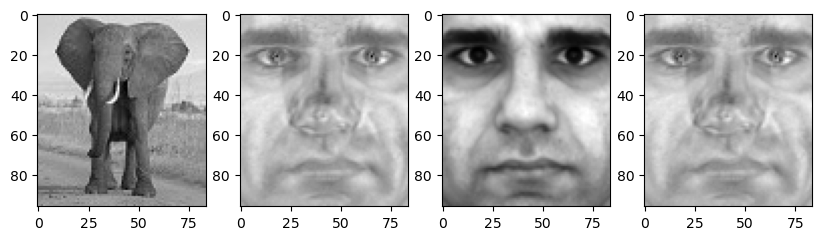

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(elephants, cmap='gray')

ax[1].imshow(reconstructed_elephants.reshape(*elephants.shape), cmap='gray') # same because operations are reversible

ax[2].imshow(reconstructed_elephants_main.reshape(*elephants.shape), cmap='gray')

ax[3].imshow(reconstructed_elephants_reduced.reshape(*elephants.shape), cmap='gray')

### G

In [114]:
space_one, one_sahpe = load_space('./assigments/assignment6/data/faces/1')
space_two, two_sahpe = load_space('./assigments/assignment6/data/faces/2')
space_three, three_sahpe = load_space('./assigments/assignment6/data/faces/3')



X_train = np.hstack((space_one, space_two, space_three)).T
Y_train = np.hstack((np.zeros(space_one.shape[1]), np.ones(space_two.shape[1]), np.ones(space_three.shape[1]) * 2))

In [115]:
n_features = X_train.shape[1]
total_mean = np.mean(X_train, axis=0).reshape(n_features, 1)

In [135]:
main_vectors, _ = dual_pca(X_train)
X_train_projected = project(X_train.T, main_vectors.T, total_mean)[:100]

X_train = X_train_projected.T

In [139]:
n_features = X_train.shape[1]
class_means = np.array([np.mean(X_train[Y_train == i], axis=0) for i in range(3)])

In [140]:
within_class_scatter = np.zeros((n_features, n_features))
for i in range(3):
    s = np.zeros((n_features, n_features))
    for x in X_train[Y_train == i]:
        s += (x - class_means[i]).reshape(-1, 1) @ (x - class_means[i]).reshape(1, -1)
    within_class_scatter += s

In [141]:
total_mean = np.mean(X_train, axis=0).reshape(n_features, 1)
between_class_scatter = np.zeros((n_features, n_features))
for i in range(3):
    n = len(X_train[Y_train == i])
    mc = class_means[i].reshape(n_features, 1)
    between_class_scatter += n * (mc - total_mean) @ (mc - total_mean).T

In [142]:
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(within_class_scatter) @ between_class_scatter)

In [143]:
w = eigenvectors[:, np.argsort(eigenvalues)[::-1][:2]].real

In [144]:
X_lda = np.dot(X_train, w)

Text(0.5, 1.0, 'LDA')

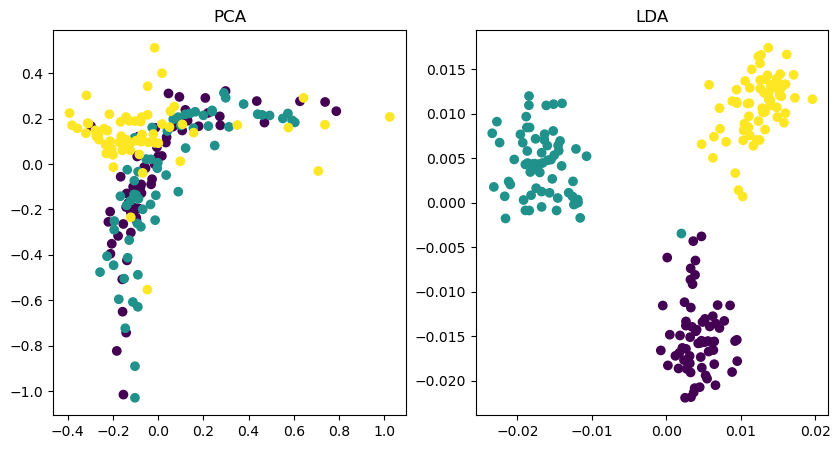

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(X_train_projected.T[:, 0], X_train_projected.T[:, 1], c=Y_train)
ax[0].set_title('PCA')

ax[1].scatter(X_lda[:, 0], X_lda[:, 1], c=Y_train)
ax[1].set_title('LDA')

### G with sklearn

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)

In [50]:
space_one, one_sahpe = load_space('./assigments/assignment6/data/faces/1')
space_two, two_sahpe = load_space('./assigments/assignment6/data/faces/2')
space_three, three_sahpe = load_space('./assigments/assignment6/data/faces/3')

X_train = np.hstack((space_one, space_two, space_three)).T
Y_train = np.hstack((np.zeros(space_one.shape[1]), np.ones(space_two.shape[1]), np.ones(space_three.shape[1]) * 2))

In [51]:
data_proj = LDA.fit_transform(X_train, Y_train)

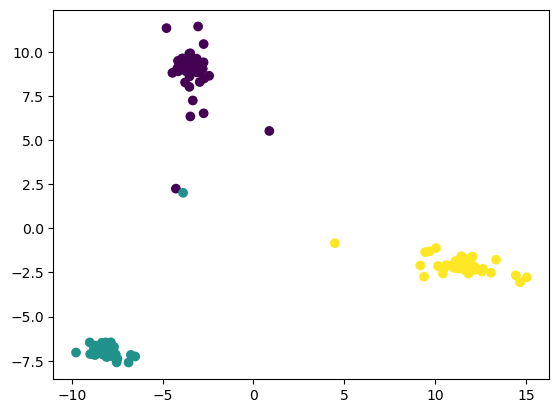

In [52]:
plt.scatter(data_proj[:, 0], data_proj[:, 1], c=Y_train)